In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [43]:
count = 15
predictions = [0] * count
data = [0] * count

for i in range(len(data)):
    data[i] += 1
    
data

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [44]:
def checkAccuracy(prediction):
    for i in range(len(prediction)):
        if prediction[i] > 1:
            prediction[i] = 1
            
    total = prediction.count(1)
    
    accuracy = total/len(prediction)
    
    return accuracy*100

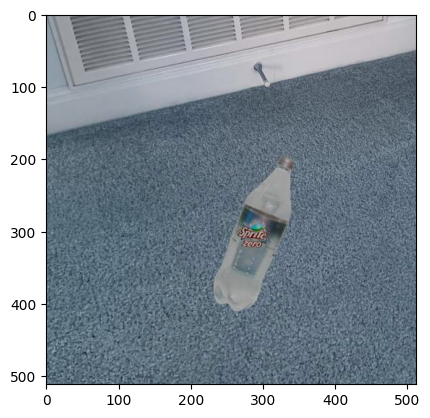

In [45]:
for i in range(15):
    path = "assets\\images\\000000"
    if(i == 0):
        path += "00"
    elif(i < 10):
        path = path + "0" + str(i)
    else:
        path += str(i)
        
    path += ".jpg"
             
    # print(path)
    
    plt.imshow(cv2.imread(path))

In [46]:
a = [1,1,1,0,1]
checkAccuracy(a)

80.0

In [47]:
neural_network = cv2.dnn.readNet("assets\\neural-network\\yolov3.weights" , "assets\\neural-network\\yolov3.cfg")

In [48]:
classes = []

with open("assets\\nueral-network\\coco.names" , 'r') as file:
    classes = file.read().splitlines()

In [49]:
def showPredictions(image):
    blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320) , (0,0,0) , swapRB = True , crop = False)

    blob.shape

    i = blob[0].reshape(320,320,3)

    plt.imshow(i)

    neural_network.setInput(blob)

    output_layers_name = neural_network.getUnconnectedOutLayersNames()

    layeroutput = neural_network.forward(output_layers_name)


    boxes = []
    confidences = []
    class_ids = []

    height = image.shape[0]
    width = image.shape[1]



    for output in layeroutput:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            
            if(confidence > 0.7):
                centre_x = int(detection[0]*width)
                centre_y = int(detection[0]*height)
                w = int(detection[0]*width)
                h = int(detection[0]*height)
                
                x = int(centre_x- w/2)
                y = int(centre_y- h/2)


                boxes.append((x,y,w,h))
                confidences.append(float(confidence))
                class_ids.append(class_id)     
                
                
    print(len(boxes))

    if(len(boxes) > 0):

        indexes = cv2.dnn.NMSBoxes(boxes,confidences , 0.5 , 0.4)

        font = cv2.FONT_HERSHEY_PLAIN

        colors = np.random.uniform(0 , 255 , size = (len(boxes) , 3))

        for i in indexes.flatten():
            x , y , w , h = boxes[i]
            label = str(classes[class_ids[i]])
            confi = str(round(confidences[i] , 2))
            color = colors[i]
            
            cv2.rectangle(image , (x,y) , (x+w,y+h) , color , 2)
            
            cv2.putText(image , label+" "+confi , (x,y+20) , font , 2 , (255,255,255) , 2)
            
    return image

3
1
1
4
2
1
1
0
0
2
1
0
0
1
2


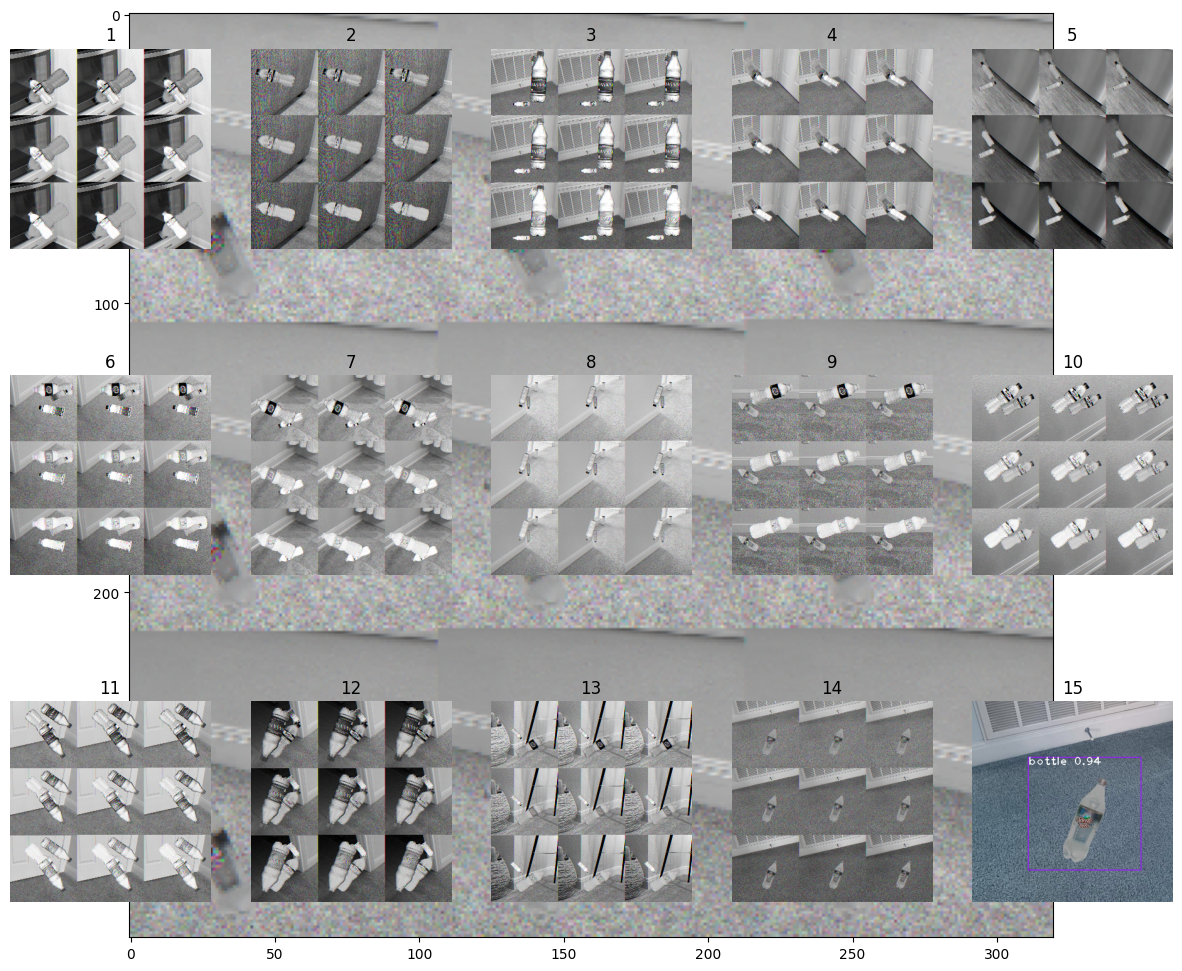

In [50]:
figure = plt.figure(figsize = (15,12))

rows = 3
columns = 5

for i in range(15):
    path = "assets\\images\\000000"
    if(i == 0):
        path += "00"
    elif(i < 10):
        path = path + "0" + str(i)
    else:
        path += str(i)
        
    path += ".jpg"
             
    # print(path)
    
    image = cv2.imread(path)
    
    image = showPredictions(image)
    
    figure.add_subplot(rows,columns,i+1)
    
    plt.imshow(image)
    plt.axis('off')
    plt.title(str(i+1))